第4回数理統計学

In [31]:
ENV["LINES"], ENV["COLUMNS"] = 100, 100
using BenchmarkTools
using Distributions
using LinearAlgebra
using Optim
using Printf
using QuadGK
using Random
Random.seed!(4649373)
using Roots
using SpecialFunctions
using StaticArrays
using StatsBase
using StatsFuns
using StatsPlots
default(fmt = :png, titlefontsize = 10, size = (400, 250))
using SymPy

In [32]:
# Override the Base.show definition of SymPy.jl:
# https://github.com/JuliaPy/SymPy.jl/blob/29c5bfd1d10ac53014fa7fef468bc8deccadc2fc/src/types.jl#L87-L105

@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::SymbolicObject)
    print(io, as_markdown("\\displaystyle " * sympy.latex(x, mode="plain", fold_short_frac=false)))
end
@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::AbstractArray{Sym})
    function toeqnarray(x::Vector{Sym})
        a = join(["\\displaystyle " * sympy.latex(x[i]) for i in 1:length(x)], "\\\\")
        """\\left[ \\begin{array}{r}$a\\end{array} \\right]"""
    end
    function toeqnarray(x::AbstractArray{Sym,2})
        sz = size(x)
        a = join([join("\\displaystyle " .* map(sympy.latex, x[i,:]), "&") for i in 1:sz[1]], "\\\\")
        "\\left[ \\begin{array}{" * repeat("r",sz[2]) * "}" * a * "\\end{array}\\right]"
    end
    print(io, as_markdown(toeqnarray(x)))
end

超重要必修問題
必修問題:大阪と構想に関する住民投票の結果について

In [33]:
# 確率関係の数値計算は対数値を使わないと多くの場合に失敗する.
# 次は二項分布における確率質量函数の対数である.
logP(n, p, k) = logabsbinomial(n, k)[1] + k*log(p) + (n-k)*log(1-p)

logP (generic function with 1 method)

In [34]:
# (1)
@show 2exp(logsumexp(logP(694844 + 705585, 0.5, k) for k in 0:694844))
@show 2cdf(Binomial(694844 + 705585, 0.5), 694844);

2 * exp(logsumexp((logP(694844 + 705585, 0.5, k) for k = 0:694844))) = 1.130422573100686e-19
2 * cdf(Binomial(694844 + 705585, 0.5), 694844) = 1.130422573435063e-19


In [35]:
# (2)
@show 2exp(logsumexp(logP(675829 + 692996, 0.5, k) for k in 0:675829))
@show 2cdf(Binomial(675829 + 692996, 0.5), 675829);

2 * exp(logsumexp((logP(675829 + 692996, 0.5, k) for k = 0:675829))) = 9.687442124914083e-49
2 * cdf(Binomial(675829 + 692996, 0.5), 675829) = 9.687442131513948e-49


In [36]:
# (3)
f(t) = ccdf(Binomial(694844 + 705585, t), 694844-1) - 0.025
g(t) =  cdf(Binomial(694844 + 705585, t), 694844)   - 0.025
@show p_L = find_zero(f, (0, 1))
@show p_U = find_zero(g, (0, 1));

p_L = find_zero(f, (0, 1)) = 0.4953366705819138
p_U = find_zero(g, (0, 1)) = 0.4969935526649652


In [37]:
# (3)
@show n = 694844 + 705585
@show k = 694844
@show α = 0.05
@show p_L = quantile(Beta(k, n-k+1), α/2)
@show p_U = quantile(Beta(k+1, n-k), 1 - α/2);

n = 694844 + 705585 = 1400429
k = 694844 = 694844
α = 0.05 = 0.05
p_L = quantile(Beta(k, (n - k) + 1), α / 2) = 0.4953366705819138
p_U = quantile(Beta(k + 1, n - k), 1 - α / 2) = 0.49699355266496514


In [38]:
# (3)
@show n = 694844 + 705585
@show k = 694844
@show α = 0.05
@show p_L = beta_inc_inv(k, n-k+1, α/2)[1]
@show p_U = beta_inc_inv(k+1, n-k, 1 - α/2)[1];

n = 694844 + 705585 = 1400429
k = 694844 = 694844
α = 0.05 = 0.05
p_L = (beta_inc_inv(k, (n - k) + 1, α / 2))[1] = 0.4953366705819138
p_U = (beta_inc_inv(k + 1, n - k, 1 - α / 2))[1] = 0.49699355266496514


In [39]:
# (4)
f(t) = ccdf(Binomial(675829 + 692996, t), 675829-1) - 0.025
g(t) =  cdf(Binomial(675829 + 692996, t), 675829)   - 0.025
@show p_L = find_zero(f, (0, 1))
@show p_U = find_zero(g, (0, 1));

p_L = find_zero(f, (0, 1)) = 0.49289139358630474
p_U = find_zero(g, (0, 1)) = 0.4945672196912542


In [40]:
# (4)
@show n = 675829 + 692996
@show k = 675829
@show α = 0.05
@show p_L = quantile(Beta(k, n-k+1), α/2)
@show p_U = quantile(Beta(k+1, n-k), 1 - α/2);

n = 675829 + 692996 = 1368825
k = 675829 = 675829
α = 0.05 = 0.05
p_L = quantile(Beta(k, (n - k) + 1), α / 2) = 0.49289139358630474
p_U = quantile(Beta(k + 1, n - k), 1 - α / 2) = 0.4945672196912543


In [53]:
# (4)
@show n = 675829 + 692996
@show k = 675829
@show α = 0.05
@show 
p_L = beta_inc_inv(k, n-k+1, α/2)[1]
@show p_U = beta_inc_inv(k+1, n-k, 1 - α/2)[1];

n = 675829 + 692996 = 1368825
k = 675829 = 675829
α = 0.05 = 0.05
p_U = (beta_inc_inv(k + 1, n - k, 1 - α / 2))[1] = 0.4945672196912543


重要必修問題
4.2必修問題:最小二乗法の計算例

In [54]:
using RDatasets
anscombe = dataset("datasets", "anscombe")

,X1,X2,X3,X4,Y1,Y2,Y3,Y4
,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.1,8.84,7.04
7,6,6,6,8,7.24,6.13,6.08,5.25
8,4,4,4,19,4.26,3.1,5.39,12.5
9,12,12,12,8,10.84,9.13,8.15,5.56


In [55]:
# コピー＆ペーストに利用するための表示
data1 = collect(zip(anscombe.X1, anscombe.Y1))
data2 = collect(zip(anscombe.X2, anscombe.Y2))
data3 = collect(zip(anscombe.X3, anscombe.Y3))
data4 = collect(zip(anscombe.X4, anscombe.Y4))
@show data1 data2 data3 data4;

data1 = [(10, 8.04), (8, 6.95), (13, 7.58), (9, 8.81), (11, 8.33), (14, 9.96), (6, 7.24), (4, 4.26), (12, 10.84), (7, 4.82), (5, 5.68)]
data2 = [(10, 9.14), (8, 8.14), (13, 8.74), (9, 8.77), (11, 9.26), (14, 8.1), (6, 6.13), (4, 3.1), (12, 9.13), (7, 7.26), (5, 4.74)]
data3 = [(10, 7.46), (8, 6.77), (13, 12.74), (9, 7.11), (11, 7.81), (14, 8.84), (6, 6.08), (4, 5.39), (12, 8.15), (7, 6.42), (5, 5.73)]
data4 = [(8, 6.58), (8, 5.76), (8, 7.71), (8, 8.84), (8, 8.47), (8, 7.04), (8, 5.25), (19, 12.5), (8, 5.56), (8, 7.91), (8, 6.89)]


In [56]:
# コピー＆ペーストに利用するための表示
@show anscombe.X1 anscombe.Y1
@show anscombe.X2 anscombe.Y2
@show anscombe.X3 anscombe.Y3
@show anscombe.X4 anscombe.Y4;

anscombe.X1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
anscombe.Y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
anscombe.X2 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
anscombe.Y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74]
anscombe.X3 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
anscombe.Y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
anscombe.X4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
anscombe.Y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]


In [57]:
function solve_anscombe(x, y;
    title="", xlim=(3, 20), ylim=(2, 14), size=(250, 225))
@show x̄ = mean(x)
@show ȳ = mean(y)
@show sx² = var(x)
@show sy² = var(y)
@show sxy = cov(x, y)
β̂ = sxy/sx²
α̂ = ȳ - β̂*x̄
σ̂ = √((n - 1)/n*(sx²*sy² - sxy^2)/sx²)
@show α̂ β̂ σ̂

plot_ols(x, y, α̂, β̂; title, xlim, ylim, size)
end

solve_anscombe (generic function with 1 method)

x̄ = mean(x) = 9.0
ȳ = mean(y) = 7.500909090909093
sx² = var(x) = 11.0
sy² = var(y) = 4.127269090909091
sxy = cov(x, y) = 5.501
α̂ = 3.0000909090909103
β̂ = 0.5000909090909091
σ̂ = 1.1731444900615435


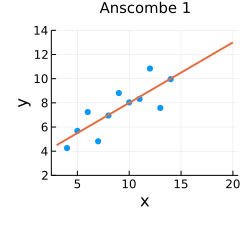

In [58]:
PA1 = solve_anscombe(anscombe.X1, anscombe.Y1, title="Anscombe 1")

x̄ = mean(x) = 9.0
ȳ = mean(y) = 7.500909090909091
sx² = var(x) = 11.0
sy² = var(y) = 4.127629090909091
sxy = cov(x, y) = 5.499999999999999
α̂ = 3.000909090909092
β̂ = 0.49999999999999994
σ̂ = 1.1737240239840163


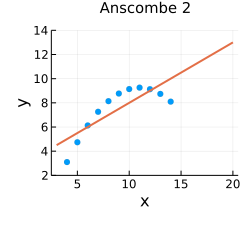

In [59]:
PA2 = solve_anscombe(anscombe.X2, anscombe.Y2, title="Anscombe 2")

x̄ = mean(x) = 9.0
ȳ = mean(y) = 7.500000000000001
sx² = var(x) = 11.0
sy² = var(y) = 4.12262
sxy = cov(x, y) = 5.497
α̂ = 3.0024545454545466
β̂ = 0.49972727272727274
σ̂ = 1.17286750183244


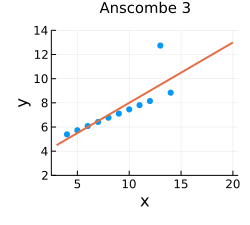

In [60]:
PA3 = solve_anscombe(anscombe.X3, anscombe.Y3, title="Anscombe 3")

x̄ = mean(x) = 9.0
ȳ = mean(y) = 7.50090909090909
sx² = var(x) = 11.0
sy² = var(y) = 4.12324909090909
sxy = cov(x, y) = 5.4990000000000006
α̂ = 3.0017272727272717
β̂ = 0.49990909090909097
σ̂ = 1.1722832405342476


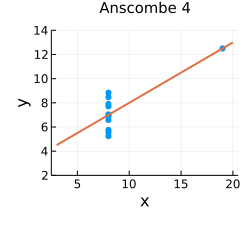

In [61]:
PA4 = solve_anscombe(anscombe.X4, anscombe.Y4, title="Anscombe 4")

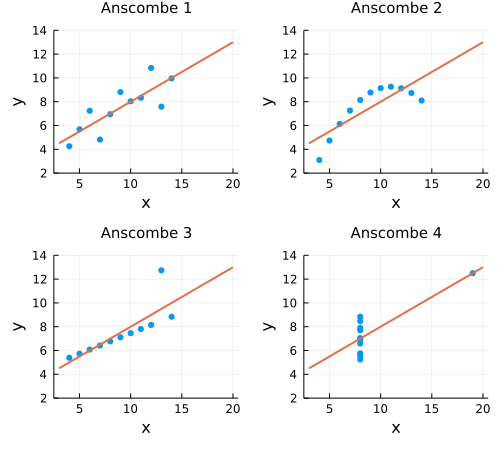

In [62]:
plot(PA1, PA2, PA3, PA4; size=(500, 450), layout=(2,2))